---
title: Dimensionality Reduction
---

In this section, I will be conducting dimensionality reduct in order to reduce the number of features in the NSDUH dataset. Even after extensive data cleaning and removing nearly half of the features in the NSDUH dataset, there are still about 1700 features left. This is an unmanageable number of features for this task, so I will be exploring dimensionality reduction techniques to reduce the number of features.

## Project Project Proposal

### Dimensionality Reduction Overview
First, I will be conducting Principle Component Analysis (PCA) to reduce the number of features. PCA does dimensionality reduction by finding the eigenvectors of the covariance matrix. I will select the principle components that explain the largest amount of variance in the data.

Next, I will be conducting feature selection using t-distributed stochastic neighbor embedding (t-SNE). t-SNE is a non-linear dimensionality reduction technique that works by minimizing the divergence between two distributions: a distribution that measures pairwise similarities of the input data points and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedded space. I will select the features that are most important for the t-SNE embedding.

Finally, I will compare the results of the two methods and select the features that are most important for both methods.

### Tools
In order to perform dimensionality reduction, I will be using the following tools:
- Python
- scikit-learn
- pandas
- numpy
- matplotlib
- seaborn


## Code Implementation

Let's start implementing these dimensionality reduction techniques!

### Principle Component Analysis (PCA)

We will begin with PCA. First, we will import the necessary libraries and load the data.

In [5]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
nsduh = pd.read_csv('../../data/clean_data/nsduh_2021.csv')

/Users/mariongeary/Library/Mobile Documents/com~apple~CloudDocs/Documents/grad_school/s1/dsan5000/dsan-5000-project-mfgeary/dsan-website/5000-website/dim-reduction


/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_23248/361501901.py:12: DtypeWarning: Columns (5,11,57,58,60,501,513,514,515,516,517,519,520,521,522,523,541,546,550,551,552,553,563,569,570,571,856,857,858,859,860,861,862,863,864,865,866,867,868,1056,1057,1058,1061,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1250,1251,1252,

Now, we can implement PCA on the NSDUH data. We will find conduct the PCA and use the `explained_variance_ratio_` attribute to see how much variance is explained by each principle component. We will test many different values for the number of principle components to see how many principle components we should use, and we will select the number of principle components that explain the most variance in the data. Typically the optimal number of principle components is about $\sqrt{n}$, where $n$ is the number of features in the data. In the case, $\sqrt{1700}$ is about 41, so we will test values from 1 to 50 for the number of principle components.

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a copy of the data
nsduh_pca = nsduh.copy()

# Drop na values and target variable
nsduh_pca = nsduh_pca.dropna()
nsduh_pca = nsduh_pca.drop('smipppy', axis=1)

# Convert categorical variables to dummy variables
nsduh_pca = pd.get_dummies(nsduh_pca)

# Standardize the data
scaler = StandardScaler()
nsduh_pca = scaler.fit_transform(nsduh_pca)

/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

In [22]:
pca_data = []
pca = PCA(n_components=1000)
pca.fit(nsduh_pca)
print('Explained variance sum: {}'.format(pca.explained_variance_ratio_.sum()))

Explained variance sum: 0.5838283822929689


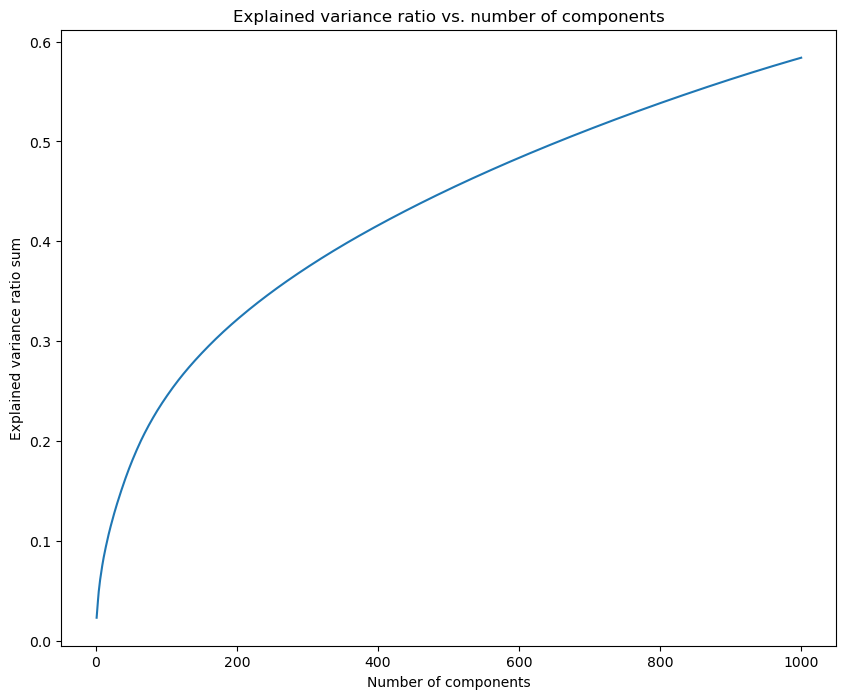

In [25]:
pca_data = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained_variance_ratio'])
pca_data['n_components'] = range(1, len(pca_data) + 1)

pca_data['explained_variance_ratio_sum'] = pca_data['explained_variance_ratio'].cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 8))
sns.lineplot(x='n_components', y='explained_variance_ratio_sum', data=pca_data)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio sum')
plt.title('Explained variance ratio vs. number of components')
plt.show()

### T-Distributed Stochastic Neighbor Embedding (t-SNE)

Now, we will implement t-SNE. t-SNE is best used for compressing high-dimensional data into a low-dimensional space for visualization, and works best with less than 50 features. However, our data has about 1700 features, 

In [36]:
from sklearn.manifold import TSNE
from tqdm import tqdm

nsduh_tsne = nsduh_pca.copy()

perplexities = {}
for j in tqdm(range(5, 50, 5)):
    tsne = TSNE(n_components=2, perplexity=j, learning_rate='auto', init='random', random_state=87)
    X_embedded = tsne.fit_transform(nsduh_tsne)
    perplexities[j] = (X_embedded, tsne.kl_divergence_, tsne)
    print('Perplexity: {}'.format(j))
    print('KL divergence: {}'.format(tsne.kl_divergence_))

 11%|█         | 1/9 [06:06<48:49, 366.18s/it]

Perplexity: 5
KL divergence: 2.8341455459594727


 22%|██▏       | 2/9 [12:34<44:13, 379.14s/it]

Perplexity: 10
KL divergence: 2.8213579654693604


 33%|███▎      | 3/9 [19:24<39:20, 393.43s/it]

Perplexity: 15
KL divergence: 2.8338541984558105


 44%|████▍     | 4/9 [1:16:55<2:13:22, 1600.53s/it]

Perplexity: 20
KL divergence: 2.839709997177124


 56%|█████▌    | 5/9 [1:41:19<1:43:24, 1551.21s/it]

Perplexity: 25
KL divergence: 2.8464717864990234


 67%|██████▋   | 6/9 [1:51:43<1:01:47, 1235.76s/it]

Perplexity: 30
KL divergence: 2.8988637924194336


 78%|███████▊  | 7/9 [1:57:36<31:34, 947.30s/it]   

Perplexity: 35
KL divergence: 2.9204325675964355


 89%|████████▉ | 8/9 [2:03:54<12:46, 766.10s/it]

Perplexity: 40
KL divergence: 2.9536099433898926


100%|██████████| 9/9 [2:10:22<00:00, 869.15s/it]

Perplexity: 45
KL divergence: 2.9646353721618652


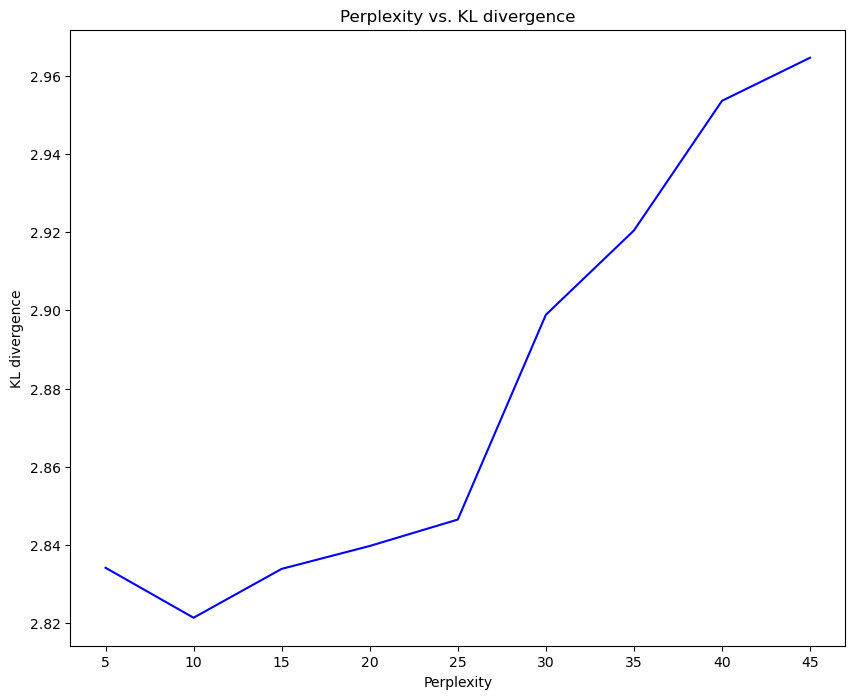

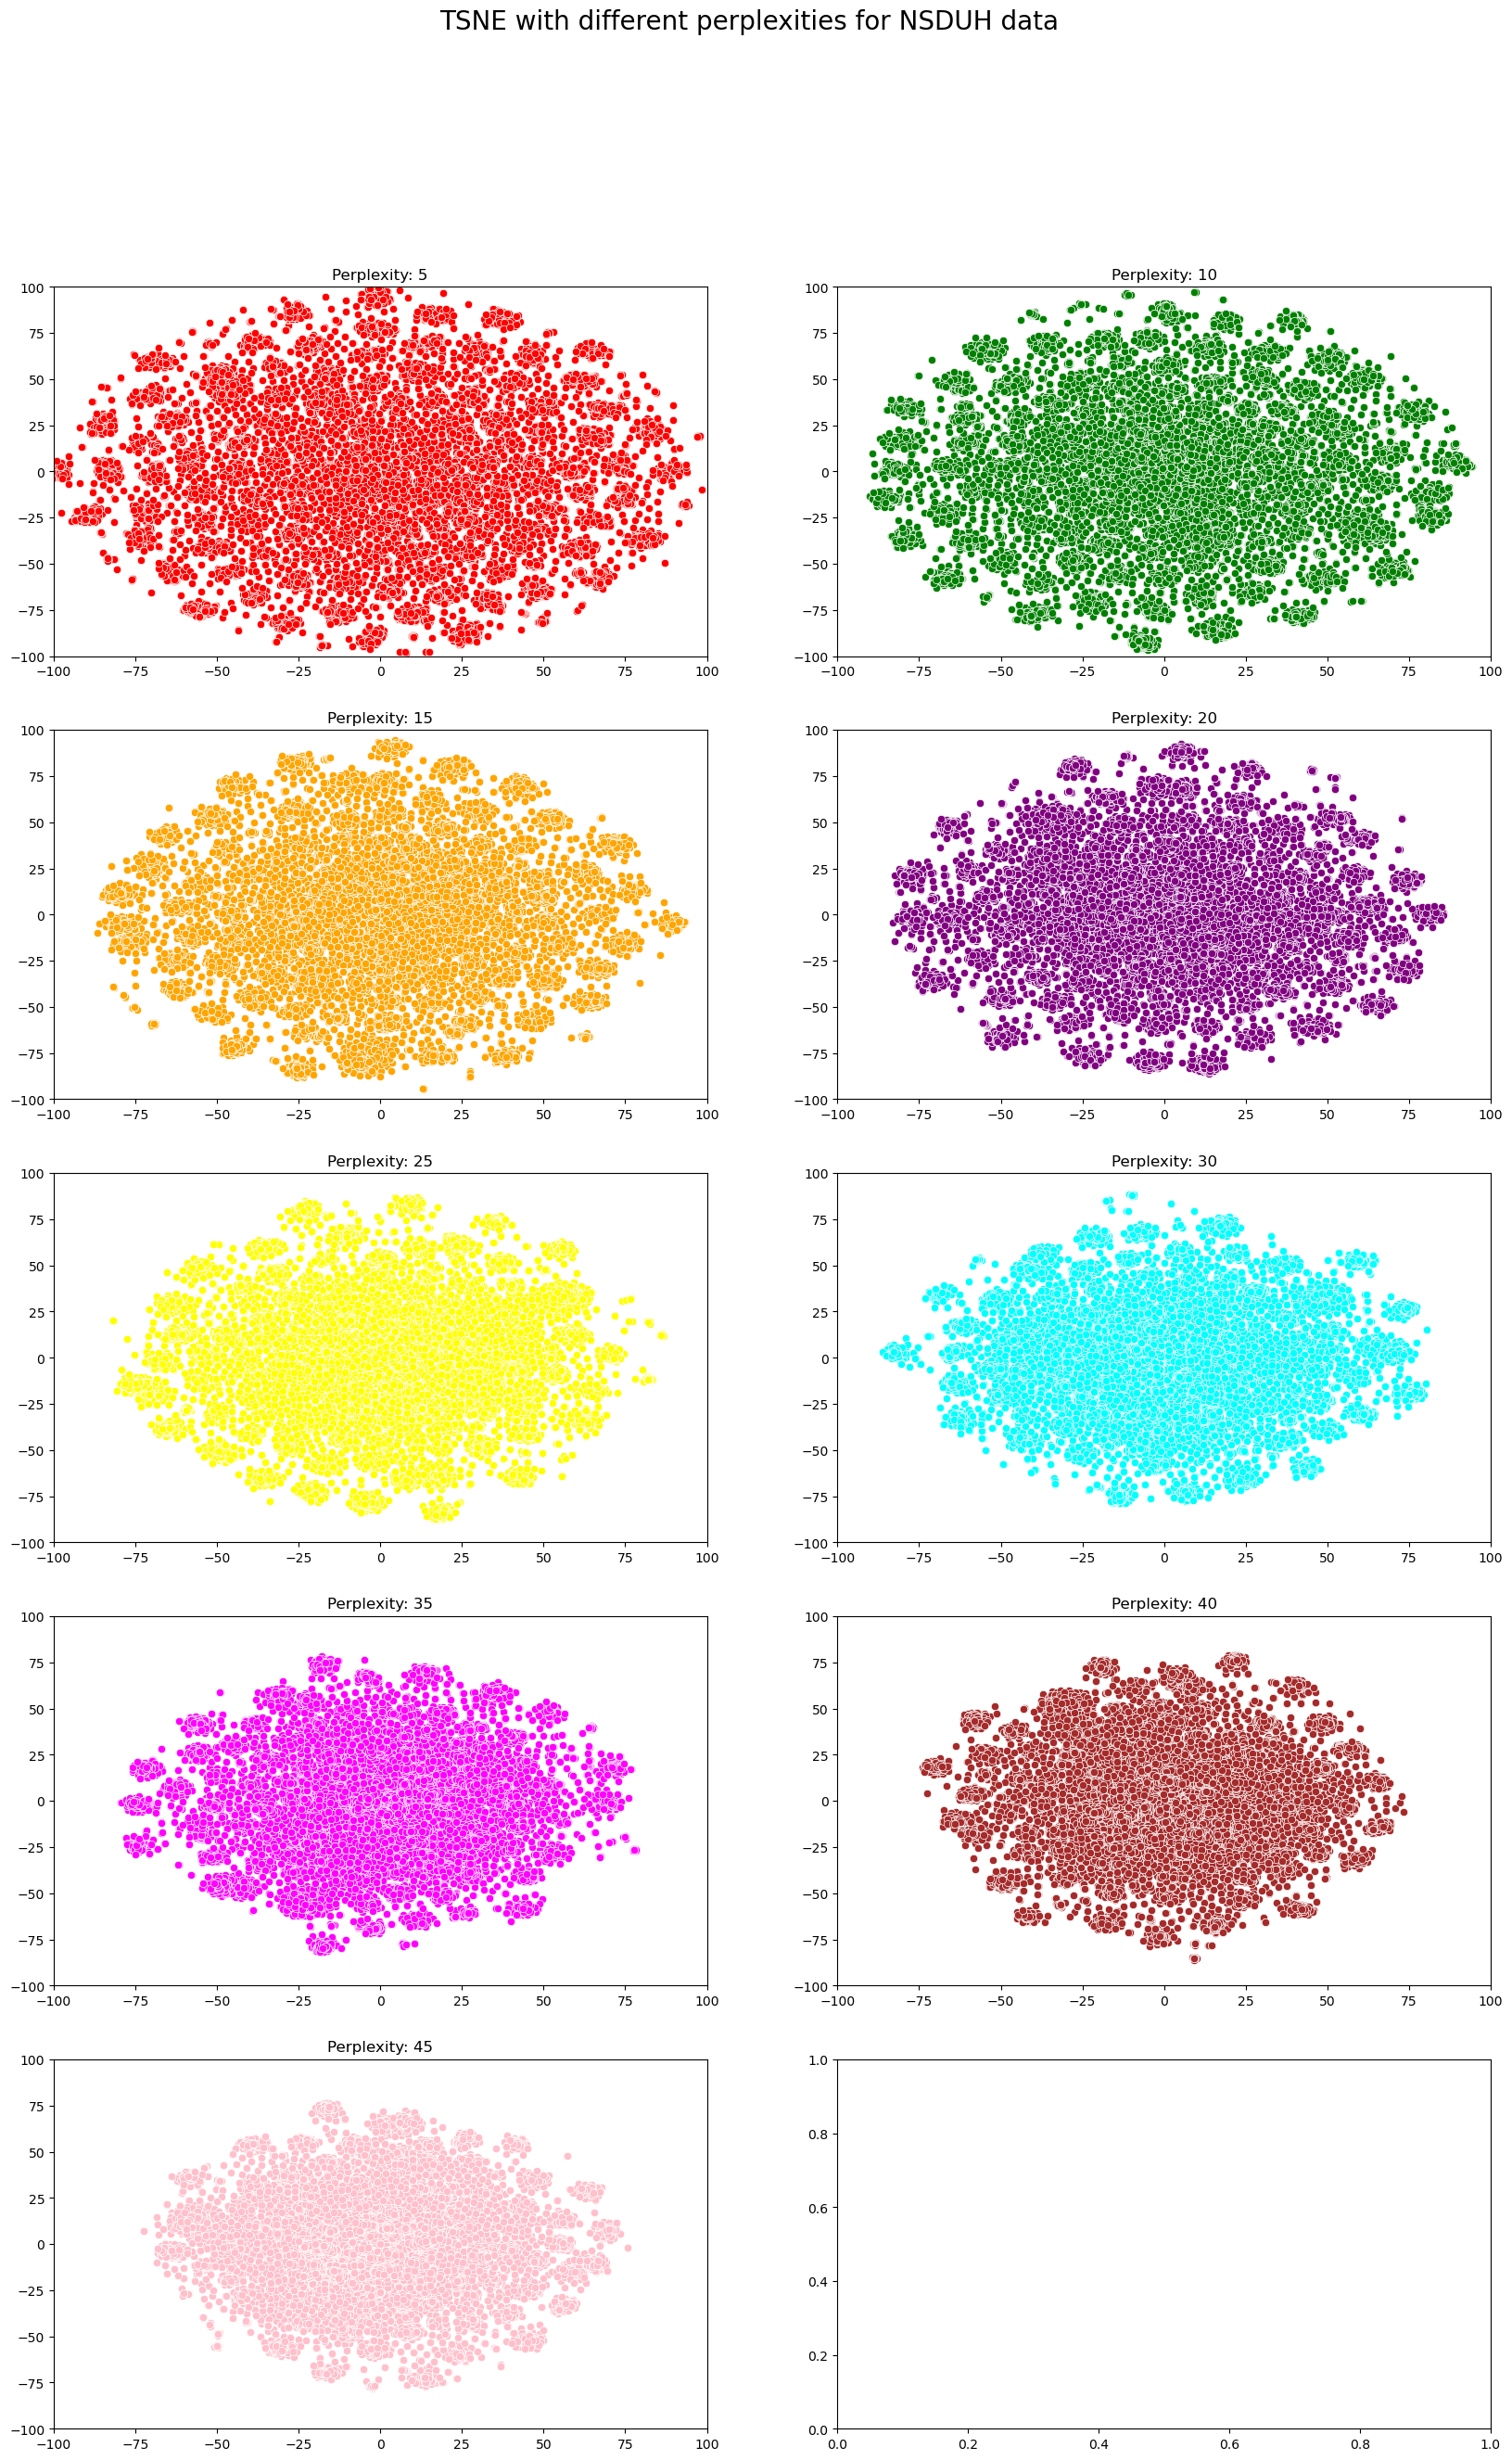

In [50]:
# Plot the perplexity vs. KL divergence
plt.figure(figsize=(10, 8))
sns.lineplot(x=list(perplexities.keys()), y=[i[1] for i in perplexities.values()], color='blue')
plt.xlabel('Perplexity')
plt.ylabel('KL divergence')
plt.title('Perplexity vs. KL divergence')
plt.show()

# Plot the X_embedded for each perplexity in its own subplot
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
plt.suptitle('TSNE with different perplexities for NSDUH data', fontsize=20)

axes = axes.flatten()
colors = ['red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'gray']
for i, j in enumerate(perplexities.keys()):
    sns.scatterplot(x=perplexities[j][0][:, 0], y=perplexities[j][0][:, 1], ax=axes[i], color=colors[i])
    axes[i].set_title('Perplexity: {}'.format(j))
    axes[i].set_xlim([-100, 100])  # Set the x-axis limits
    axes[i].set_ylim([-100, 100])  # Set the y-axis limits
plt.show()


Based on these plots of the t-SNE embedding, we can see that the optimal perplexity value is 10. When the perplexity value is 10, the KL divergence is minimized and the t-SNE embedding is most accurate.

Overall, we can say that t-SNE is not a very good choice for dimensionality reduction in this case. When we have such high dimensional data, we need to use a different dimensionality reduction technique such as PCA.